# **Importing libraries and dataset**

In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [152]:
dataset = pd.read_csv('parkinsons_updrs.csv')

# **Descriptive statistics**



In [153]:
# Preview dataset
dataset.head()

,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,total_UPDRS
0,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,34.398
1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810,34.894
2,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014,35.389
3,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277,35.810
4,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361,36.375


In [154]:
# Dataset Dimensions
dataset.shape

(5875, 20)

In [155]:
# features summary
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5875 non-null   int64  
 1   sex            5875 non-null   int64  
 2   test_time      5875 non-null   float64
 3   Jitter(%)      5875 non-null   float64
 4   Jitter(Abs)    5875 non-null   float64
 5   Jitter:RAP     5875 non-null   float64
 6   Jitter:PPQ5    5875 non-null   float64
 7   Jitter:DDP     5875 non-null   float64
 8   Shimmer        5875 non-null   float64
 9   Shimmer(dB)    5875 non-null   float64
 10  Shimmer:APQ3   5875 non-null   float64
 11  Shimmer:APQ5   5875 non-null   float64
 12  Shimmer:APQ11  5875 non-null   float64
 13  Shimmer:DDA    5875 non-null   float64
 14  NHR            5875 non-null   float64
 15  HNR            5875 non-null   float64
 16  RPDE           5875 non-null   float64
 17  DFA            5875 non-null   float64
 18  PPE     

In [156]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5875.0,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.0,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.0,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
Jitter(%),5875.0,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.0,0.000044,0.000036,0.000002,0.000022,0.000034,0.000053,0.000446
Jitter:RAP,5875.0,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.0,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560
Jitter:DDP,5875.0,0.008962,0.009371,0.000980,0.004730,0.006750,0.009870,0.172630
Shimmer,5875.0,0.034035,0.025835,0.003060,0.019120,0.027510,0.039750,0.268630
Shimmer(dB),5875.0,0.310960,0.230254,0.026000,0.175000,0.253000,0.365000,2.107000


In [157]:
# Counting null values
dataset.isnull().sum()

age              0
sex              0
test_time        0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
total_UPDRS      0
dtype: int64

### **Observations**
1. The dataset has 5875 records and 20 features which have either int or float datatype.
2. There are zero Nan values / null values in the dataset which indicates there is no missing data.
3. In the sex column, 0 represents male and 1 represents female.
4. We aim to predict total_UPDRS.

# **Data visualization**

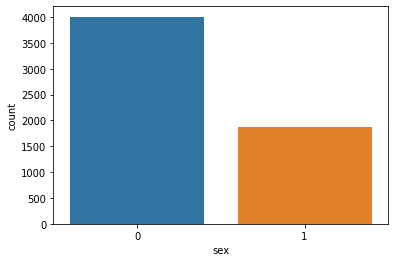

In [158]:
# Countplot based on gender
sns.countplot(x = 'sex', data = dataset)

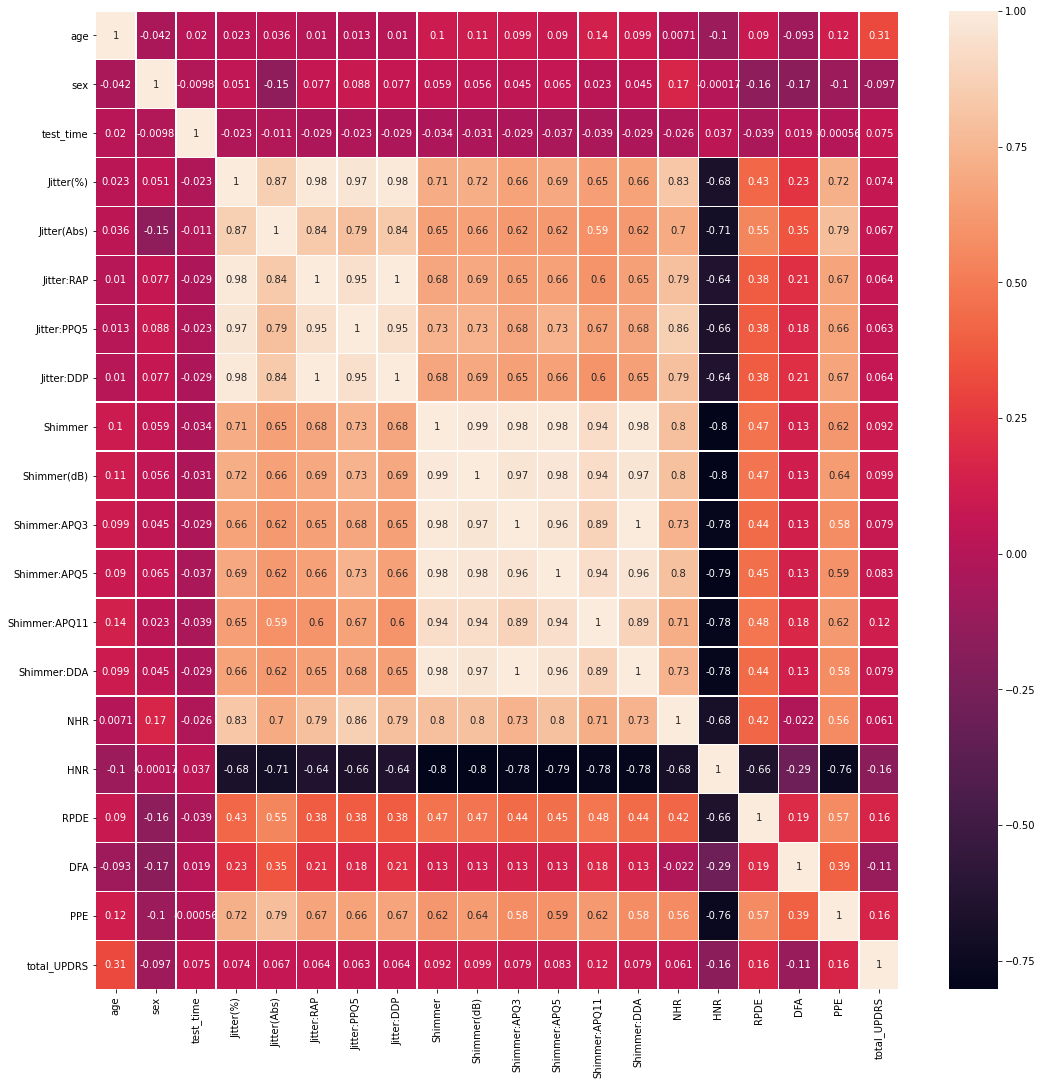

In [159]:
# heatmap for feature selection
fig, ax = plt.subplots(figsize = (18, 18))
sns.heatmap(dataset.corr(), annot = True, linewidths = 0.5, ax = ax)
plt.show()

### **Observations**
1. The countplot tells that the dataset contains more male test subjects as compared to female test subjects.
2. The heatmap indicates that there is a high correlation between total_UPDRS and [age, PPE, RPDE, Shimmer:APQ11]. We can select these features to take input and predict output.

# **Data preprocessing**

In [160]:
# Splitting dataset into X and y
X = dataset.iloc[:, [0, 12, 16, 18]].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [161]:
# Feature scaling
y_train = y_train.reshape(len(y_train), 1)
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler(feature_range = (7, 55))
sc_y =  MinMaxScaler(feature_range = (7, 55))
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

In [162]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (4700, 4)
X_test shape: (1175, 4)
Y_train shape: (4700, 1)
Y_test shape: (1175,)


# **Data Modeling**

In [163]:
# Multiple Linear Regression Algorithm
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
# Support Vector Regression Algorithm
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [165]:
# Decision Tree Regression Algorithm
from sklearn.tree import DecisionTreeRegressor
dectree_reg = DecisionTreeRegressor(random_state = 0)
dectree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [166]:
# Random forest regression algorithm
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
forest_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [167]:
# Making predictions on test dataset
y_pred_lin = sc_y.inverse_transform(lin_reg.predict(sc_X.transform(X_test)))
y_pred_svr = sc_y.inverse_transform([svr_reg.predict(sc_X.transform(X_test))])
y_pred_dectree = sc_y.inverse_transform([dectree_reg.predict(sc_X.transform(X_test))])
y_pred_forest = sc_y.inverse_transform([forest_reg.predict(sc_X.transform(X_test))])

# ** Evaluating models **

In [171]:
# Evaluating using r2_score metrics
from sklearn.metrics import r2_score
r2_linear = r2_score(y_test, y_pred_lin)
r2_svr = r2_score(y_test, y_pred_svr.ravel())
r2_dectree = r2_score(y_test, y_pred_dectree.ravel())
r2_forest = r2_score(y_test, y_pred_forest.ravel())

In [175]:
print('Multiple Linear Regression: ', str(r2_linear * 100))
print('Support Vector Regression: ', str(r2_svr * 100))
print('Decision Tree Regression: ', str(r2_dectree * 100))
print('Random Forest Regression: ', str(r2_forest * 100))

Multiple Linear Regression:  10.665128291156222
Support Vector Regression:  18.248346375878597
Decision Tree Regression:  63.47603061954437
Random Forest Regression:  77.2629531347979


From the above comparison we can see that random forest regression has the highest r2 score of 77.26%